In [1]:
'''
Assignment 1: Linear Regression using Numpy (No deep learning/ automatic differentiation libraries are allowed)


Use Python2.7 environment
Roll No: 14EC35011
Name: Piyush Jena

'''

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Fix seed for reproducibility
np.random.seed(100)

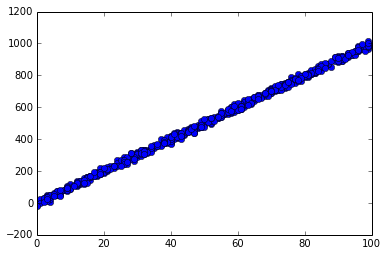

In [9]:
def generate_dataset():
    '''
    Function to generate the dataset for our problem
    Args:
        None
    Return:
        X: 
    '''
    N = 600
    X = np.random.randint(100, size=N)
    e = np.random.normal(0., 12., N)
    y = 10*X + e #Note the use of broadcasting here
    
    return X, y

X, y = generate_dataset()
# Now lets visualize our data
plt.plot(X, y, 'bo')
plt.show()

# get N  ------> ? 
N = X.shape[0] #fill in these

# shuffle the dataset randomly
# X, y contains the data after shuffling randomly X and y
#X, y = [], [] # ?
if(len(X.shape) == 1):
    X = X.reshape(N,1)
if(len(y.shape) == 1):
    y = y.reshape(N,1)
data = np.hstack([X,y])

np.random.shuffle(data)
X = np.transpose(data)[0]
y = np.transpose(data)[1]

if(len(X.shape) == 1):
    X = X.reshape(N,1)
if(len(y.shape) == 1):
    y = y.reshape(N,1)

# Created train and test set
training_size = int(0.8*N)

X_train = X[:training_size]
y_train = y[:training_size]
X_test = X[training_size:]
y_test = y[training_size:]

if(len(X_train.shape) == 1):
    X_train = X_train.reshape(training_size,1)
if(len(y_train.shape) == 1):
    y_train = y_train.reshape(training_size,1)

if(len(X_test.shape) == 1):
    X_test = X_test.reshape(N-training_size,1)
if(len(y_test.shape) == 1):
    y_test = y_test.reshape(N-training_size,1)

Starting Training with Gradient Descent
143695085.73847282
134177815.97746298
125291203.91769162
116993459.30353686
109245561.09231357
102011073.95359427
95255976.92812178
88948503.44056395
83058991.9137529
77559746.28190595
72424905.74687693
67630323.16495219
63153451.492292106
58973237.755015686
55070024.04531083
51425455.07799388
48022391.87279327
44844831.15643862
41877830.105534986
39107436.07631767
36520620.990833774
34105220.07099473
31849874.632389896
29743978.66884297
27777628.976519354
25941578.583037607
24227193.262580343
22626410.932512313
21131703.740563646
19736042.664289325
18432864.456329856
17216040.780029833
16079849.390271064
15018947.223995231
14028345.27387119
13103385.126947682
12239717.057961933
11433279.574285567
10680280.316315636
9977178.223492865
9320666.882080913
8707658.976397665
8135271.770378926
7600813.551199835
7101770.971203804
6635797.228613006
6200701.031438823
5794436.29269397
5415092.50844684
5060885.773469871
4730150.392231998
4421331.045785051
41

69750.47500173835
69750.47491551262
69750.4748292873
69750.4747430624
69750.4746568379
69750.47457061379
69750.47448439014
69750.47439816686
69750.47431194398
69750.47422572155
69750.47413949952
69750.47405327787
69750.47396705665
69750.47388083584
69750.47379461545
69750.4737083954
69750.47362217584
69750.47353595665
69750.47344973788
69750.47336351953
69750.47327730159
69750.473191084
69750.47310486688
69750.47301865014
69750.47293243384
69750.47284621792
69750.47276000242
69750.47267378733
69750.47258757264
69750.47250135834
69750.47241514447
69750.472328931
69750.47224271797
69750.47215650532
69750.4720702931
69750.47198408129
69750.47189786984
69750.47181165882
69750.47172544825
69750.47163923804
69750.47155302824
69750.47146681885
69750.4713806099
69750.47129440137
69750.4712081932
69750.47112198548
69750.47103577816
69750.47094957123
69750.47086336471
69750.47077715863
69750.4706909529
69750.47060474762
69750.47051854274
69750.47043233828
69750.47034613421
69750.47025993055
6975

69750.37739811843
69750.37731235538
69750.37722659274
69750.37714083053
69750.37705506866
69750.3769693073
69750.37688354627
69750.37679778568
69750.37671202549
69750.37662626567
69750.3765405063
69750.37645474733
69750.37636898874
69750.37628323061
69750.37619747284
69750.37611171546
69750.37602595854
69750.37594020196
69750.37585444587
69750.37576869014
69750.37568293483
69750.3755971799
69750.3755114254
69750.37542567129
69750.3753399176
69750.3752541643
69750.37516841142
69750.37508265898
69750.3749969069
69750.37491115526
69750.374825404
69750.37473965314
69750.37465390269
69750.37456815265
69750.37448240301
69750.37439665385
69750.374310905
69750.37422515659
69750.3741394086
69750.374053661
69750.37396791381
69750.37388216704
69750.37379642064
69750.37371067471
69750.37362492911
69750.37353918396
69750.37345343918
69750.37336769486
69750.37328195092
69750.3731962074
69750.37311046426
69750.37302472157
69750.37293897927
69750.37285323732
69750.37276749584
69750.37268175476
69750.3

69750.28330408502
69750.28321876805
69750.28313345143
69750.28304813523
69750.28296281946
69750.28287750405
69750.2827921891
69750.28270687451
69750.28262156036
69750.28253624658
69750.28245093323
69750.28236562028
69750.2822803077
69750.28219499558
69750.28210968382
69750.28202437249
69750.28193906158
69750.28185375103
69750.28176844091
69750.28168313116
69750.28159782186
69750.28151251294
69750.28142720445
69750.28134189633
69750.28125658867
69750.28117128136
69750.28108597445
69750.28100066798
69750.28091536192
69750.28083005622
69750.28074475095
69750.28065944607
69750.28057414164
69750.28048883755
69750.28040353389
69750.28031823068
69750.28023292779
69750.28014762537
69750.28006232332
69750.27997702168
69750.27989172046
69750.27980641962
69750.2797211192
69750.2796358192
69750.2795505196
69750.27946522037
69750.27937992159
69750.27929462318
69750.27920932519
69750.27912402758
69750.27903873043
69750.27895343362
69750.27886813725
69750.27878284131
69750.27869754573
69750.278612250

69750.17578558129
69750.17570077401
69750.17561596708
69750.17553116055
69750.17544635445
69750.17536154874
69750.17527674341
69750.17519193851
69750.175107134
69750.1750223299
69750.17493752617
69750.17485272288
69750.17476792
69750.17468311751
69750.17459831541
69750.17451351373
69750.1744287124
69750.17434391152
69750.17425911107
69750.17417431099
69750.1740895113
69750.17400471203
69750.17391991313
69750.17383511465
69750.17375031658
69750.17366551892
69750.1735807216
69750.17349592477
69750.17341112829
69750.17332633221
69750.17324153657
69750.17315674131
69750.17307194648
69750.17298715198
69750.17290235792
69750.17281756431
69750.17273277105
69750.1726479782
69750.17256318574
69750.1724783937
69750.17239360204
69750.17230881081
69750.17222402
69750.17213922954
69750.17205443949
69750.17196964986
69750.17188486063
69750.17180007181
69750.17171528336
69750.17163049534
69750.17154570774
69750.1714609205
69750.17137613369
69750.17129134724
69750.17120656122
69750.17112177565
69750.1

69750.08198082697
69750.08189646431
69750.08181210206
69750.0817277402
69750.08164337877
69750.08155901772
69750.08147465708
69750.08139029681
69750.08130593695
69750.08122157754
69750.08113721848
69750.08105285981
69750.08096850158
69750.08088414371
69750.08079978629
69750.08071542921
69750.08063107257
69750.08054671633
69750.08046236046
69750.08037800502
69750.08029364997
69750.08020929532
69750.08012494104
69750.08004058721
69750.07995623373
69750.07987188069
69750.07978752806
69750.07970317581
69750.07961882395
69750.07953447252
69750.07945012143
69750.0793657708
69750.07928142052
69750.0791970707
69750.07911272126
69750.07902837217
69750.07894402355
69750.07885967528
69750.07877532739
69750.07869097995
69750.07860663293
69750.07852228626
69750.07843794003
69750.07835359414
69750.0782692487
69750.07818490364
69750.07810055895
69750.07801621474
69750.07793187088
69750.07784752743
69750.07776318435
69750.07767884171
69750.07759449947
69750.07751015759
69750.07742581614
69750.07734147

69749.96510195646
69749.9650181479
69749.96493433967
69749.96485053186
69749.96476672444
69749.96468291743
69749.96459911087
69749.96451530463
69749.96443149881
69749.9643476934
69749.96426388837
69749.96418008373
69749.96409627948
69749.96401247567
69749.96392867224
69749.96384486921
69749.96376106658
69749.96367726434
69749.96359346248
69749.96350966103
69749.96342586001
69749.96334205935
69749.96325825909
69749.96317445923
69749.96309065976
69749.9630068607
69749.96292306205
69749.96283926375
69749.9627554659
69749.96267166841
69749.96258787133
69749.96250407468
69749.96242027837
69749.96233648251
69749.96225268701
69749.96216889191
69749.96208509724
69749.96200130292
69749.96191750905
69749.96183371553
69749.96174992244
69749.96166612975
69749.96158233742
69749.96149854551
69749.961414754
69749.96133096288
69749.96124717215
69749.96116338183
69749.9610795919
69749.96099580236
69749.96091201322
69749.96082822447
69749.96074443618
69749.96066064821
69749.96057686067
69749.9604930735


69749.83991786835
69749.83983465319
69749.8397514384
69749.83966822401
69749.83958501002
69749.83950179644
69749.83941858324
69749.83933537043
69749.839252158
69749.839168946
69749.83908573436
69749.83900252313
69749.83891931231
69749.83883610187
69749.8387528918
69749.83866968215
69749.83858647288
69749.83850326405
69749.83842005554
69749.83833684749
69749.8382536398
69749.8381704325
69749.83808722561
69749.83800401911
69749.83792081304
69749.83783760732
69749.83775440202
69749.83767119706
69749.83758799257
69749.83750478839
69749.83742158467
69749.83733838133
69749.83725517843
69749.83717197584
69749.83708877368
69749.8370055719
69749.83692237054
69749.83683916955
69749.83675596895
69749.83667276881
69749.836589569
69749.8365063696
69749.83642317061
69749.836339972
69749.83625677381
69749.83617357592
69749.83609037852
69749.8360071815
69749.83592398488
69749.83584078861
69749.83575759274
69749.8356743973
69749.83559120225
69749.83550800759
69749.8354248133
69749.83534161944
69749.835

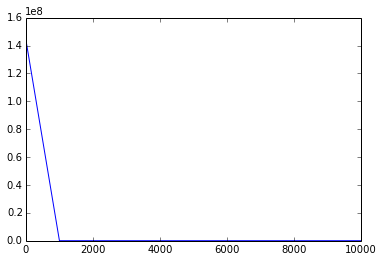

In [13]:
class LinearRegression(object):
    def __init__(self):
        #Initialize all parameters
        self.w = np.random.uniform(-1,1,None) #? Sample from a uniform distribution between -1 and 1
        self.b = np.random.uniform(-1,1,None) #? Sample from a uniform distribution between -1 and 1
    
    def forward(self, x):
        '''
            Do a forward pass of the classifier:
            Args:
                x: Input X value
            Return:
                y: y = wx + b
        '''
        # Complete this function
        return self.w*x + self.b
        
    
    def backward(self, x, ypred, y_train, lr):
        '''
            Computes all gradients and updates the parameters w and b
            Args:
                x : x
                ypred: y=wx+b
                y_train = ground truth values
                lr = learning rate
        '''
        b_grad = np.sum(ypred-y_train)/y_train.shape[0] # ? Compute derivate of loss wrt w 
        w_grad = (np.sum((ypred-y_train)*X_train))/y_train.shape[0] # ? Compute derivate of loss wrt w
        self.w = self.w - lr*w_grad # Updating w
        self.b = self.b - lr*b_grad # Updating b

def MSELoss(y, ypred):
    '''
        Args:
            y: ground truth labels
            ypred: predicted labels
        Return:
            Mean squared error loss
    '''
    # Complete this function
    return np.sum((ypred-y)**2)
        

print 'Starting Training with Gradient Descent'
lreg = LinearRegression()
epochs = 10000
learning_rate = 0.00001

loss_history = []
epoch_history = []

# Gradient Descent
for e in range(epochs):
    ypred = lreg.forward(X_train)
    loss = MSELoss(y_train, ypred)
    print loss
    if e==0 or (e+1)%1000==0:
        loss_history.append(loss)
        epoch_history.append(e+1)
    
    lreg.backward(X_train, ypred, y_train, learning_rate)

print 'Loss fuction decrease after ' + str(epochs) + ' epochs of training'

#Plot the decrease in loss with epoch
plt.plot(epoch_history, loss_history)
plt.show()

In [17]:
print 'Final Training loss:' + str()  # Print training loss ?
print 'Starting to test'
ypred =  lreg.forward(X_test)# find predictions on test set ?
loss = MSELoss(y_test, ypred) # compute loss on test set ?
print 'Final test loss: ' + str(loss)

Final Training loss:
Starting to test
Final test loss: 17248.24990314895


Visualizing learnt function on test data


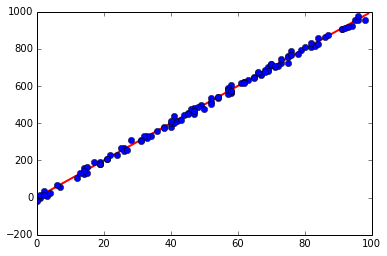

In [18]:
print 'Visualizing learnt function on test data'

x_ = np.arange(100)
y_ = lreg.w*x_ + lreg.b

plt.plot(x_, y_, 'r-', linewidth=2.0)
plt.plot(X_test, y_test, 'bo')
plt.show()